In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

In [3]:
import causality as intest
import viz

In [98]:
target = 1 # By defaul X->Y
nb_samples = 300

Nx = {
    'name': 'uniform',
    'var': 7
}

Ny = {
    'name': 'normal',
    'var': 14
}


f = lambda x: np.tanh(x) + 2*np.sin(2*x) + x**3

In [99]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y

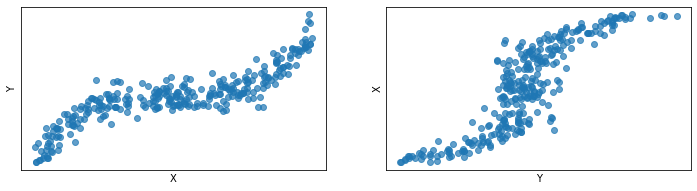

In [100]:
# with plt.xkcd():
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

axes[0].scatter(x, y, alpha=.7)
axes[1].scatter(y, x, alpha=.7)

#     axes[0].set_title('X -> Y')
#     axes[1].set_title('Y -> X')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].set_xlabel('Y')
axes[1].set_ylabel('X')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set

    plt.savefig('algo_data')

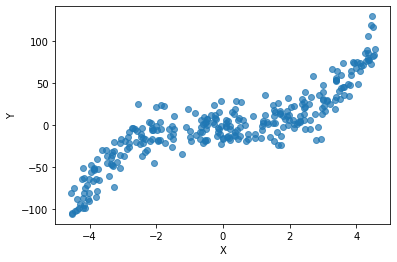

In [130]:
viz.pretty_scatter(x, y, 'X', 'Y', 'algo_direct')

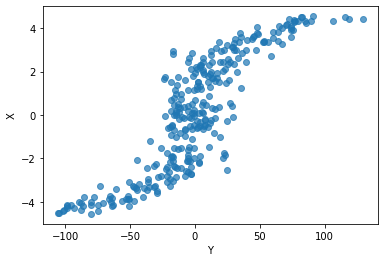

In [131]:
viz.pretty_scatter(y, x, 'Y', 'X', 'algo_reverse')

In [101]:
# metric_name = 'mmd_median_heuristic'
# metric_name = 'mmd'
metric_name = 'l1'
n_clusters = 2
bins = 10

In [117]:
X_, Y_, _ = intest.partition_data(x, y, n_clusters=n_clusters)

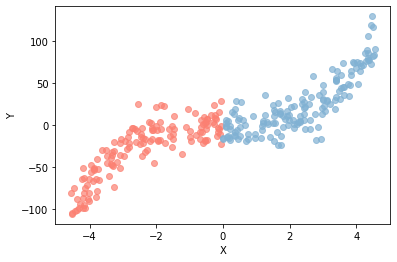

In [133]:
viz.plot_scatters(X_, Y_,'X', 'Y', 'algo_part')

In [119]:
residuals, X_, Y_, models = intest.estimate_partitioned_models(x, y, n_clusters=n_clusters)
score, pairs = intest.find_max_discrp(residuals, metric_name=metric_name)

In [120]:
score

0.05472747497219132

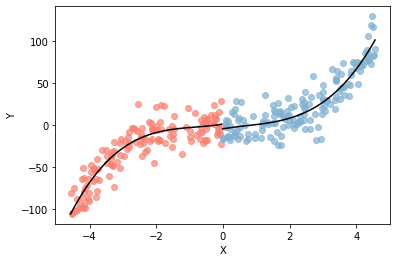

In [136]:
viz.plot_models(X_, Y_, models, x_label='X', y_label='Y', fname='algo_fit_direct')

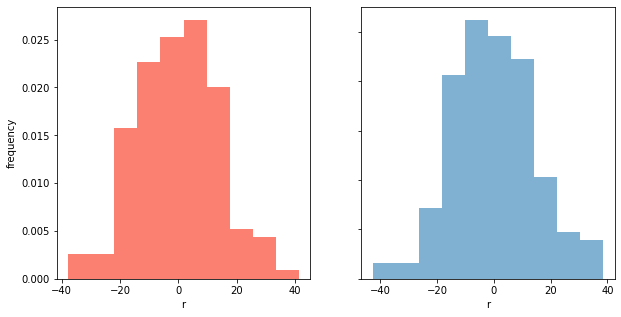

In [122]:
viz.plot_residuals(residuals, bins=bins, fname='algo_res_direct')

In [140]:
X_r, Y_r, _ = intest.partition_data(y, x, n_clusters=n_clusters)

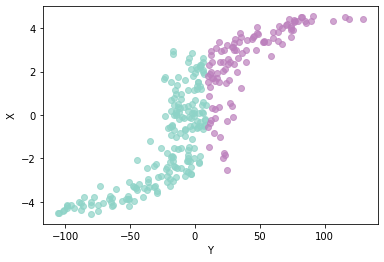

In [141]:
viz.plot_scatters(X_r, Y_r, 'Y', 'X', fname='algo_part_reverse')

In [142]:
residualsr, Y_r, X_r, modelsr = intest.estimate_partitioned_models(y, x, n_clusters=n_clusters)
scorer, pairsr = intest.find_max_discrp(residualsr, metric_name=metric_name)

In [143]:
scorer

0.27270958957401276

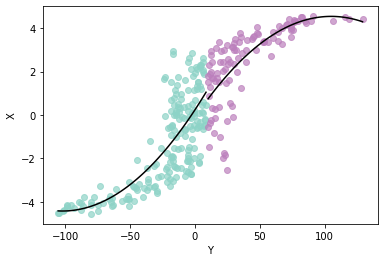

In [147]:
viz.plot_models(Y_r, X_r, modelsr, x_label='Y', y_label='X', fname='algo_fit_reverse')

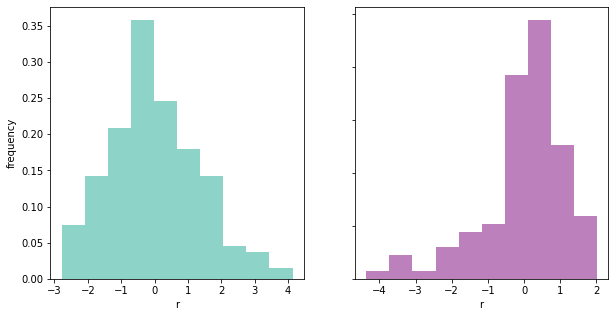

In [149]:
viz.plot_residuals(residualsr, bins=bins, fname='algo_res_reverse')

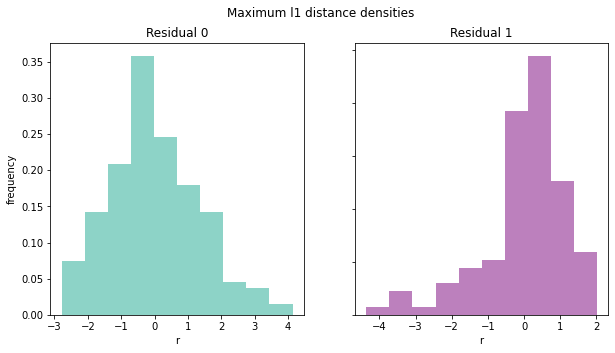

In [146]:
viz.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities', bins=bins)

In [82]:
print('X -> Y', score)

X -> Y 0.13809714973906068


In [62]:
print('X <- Y', scorer)

X <- Y 0.48021726396506736


In [63]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param

In [64]:
print('predicted:', int(score < scorer))

predicted: 1


In [65]:
print('Truth:', target)

Truth: 1
